In [1]:
from bs4 import BeautifulSoup
import requests
import  pandas  as  pd 
import  matplotlib.pyplot  as  plt
from  statsmodels.regression.linear_model  import  OLS
import numpy as np



# create data
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.norskfamilie.no/barometre/rentebarometer/')
table_html=tables[0]



# Scrape the data from the website and store numerical values

In [2]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['', 'Bank', '', 'Navn', 'Nominell', 'Sikkerhetsgebyr', 'Etableringsgebyr', 'Termin', 'Effektiv'], ['1', 'Statens pensjonskasse', '', 'Boliglån inntil 80 %', '1,69', '0', '0', '50', '1,76'], ['2', 'Bulder Bank (Sparebanken Vest)', '', 'Boliglån innenfor 50 %', '1,78', '0', '0', '0', '1,79'], ['3', 'Etne Sparebank', '', '"Him te Etne" - lånet', '1,75', '0', '0', '50', '1,83'], ['4', 'Nybygger.no (Sparebanken Øst)', '', 'Boliglån 75%', '1,81', '0', '0', '0', '1,83'], ['5', 'SpareBank 1 Nordmøre', '', 'Grønt førstehjemslån', '1,75', '1200', '0', '75', '1,86'], ['6', 'NORDirekte (Skagerrak Sparebank)', '', 'Boliglån inntil 50%', '1,80', '0', '0', '40', '1,86'], ['7', 'Bulder Bank (Sparebanken Vest)', '', 'Boliglån innenfor 55 %', '1,86', '0', '0', '0', '1,88'], ['8', 'Sunndal Sparebank', '', 'Grønt boliglån', '1,80', '1000', '0', '65', '1,89'], ['9', 'Landkreditt Bank AS', '', 'Grønt Boliglån 50%', '1,89', '500', '0', '0', '1,91'], ['10', 'SpareBank 1 SMN', '', 'Grønt førstehjemslån', '1,

In [3]:
def  save_data_to_csv ( file_name , table ): 
    """
    Stores numerical data from the table as csv separated by commas
    
    """
     
    #initialize all table columns with numerical values
    numeric_colums = ["Nominal","Security fee","Establishment fee","Term","Efficient"]
    
    df = pd.DataFrame([row[-5:] for row in table[1:]], columns=numeric_colums)
    
    #replace the commas in numeric data with "."
    df["Nominal"] = df["Nominal"].apply(lambda w: w.replace(",","."))
    df["Efficient"] = df["Efficient"].apply(lambda w: w.replace(",","."))
    
    print(df.head())
    
    #save the data to csv file
    df.to_csv(file_name)

         
    
save_data_to_csv( 'data.csv' , table )

  Nominal Security fee Establishment fee Term Efficient
0    1.69            0                 0   50      1.76
1    1.78            0                 0    0      1.79
2    1.75            0                 0   50      1.83
3    1.81            0                 0    0      1.83
4    1.75         1200                 0   75      1.86


# Regression
    I used regression to analyze the relationship between Nominal and Efficient variables from the scraped data

A bias term which is a variable "intercept" equal to one is added to x variable.

      y = α+β⋅x
 


In [4]:
#read the data into pandas dataframe
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Nominal,Security fee,Establishment fee,Term,Efficient
0,0,1.69,0,0,50,1.76
1,1,1.78,0,0,0,1.79
2,2,1.75,0,0,50,1.83
3,3,1.81,0,0,0,1.83
4,4,1.75,1200,0,75,1.86


### Scatter plot of "Nominal" against "Efficient"

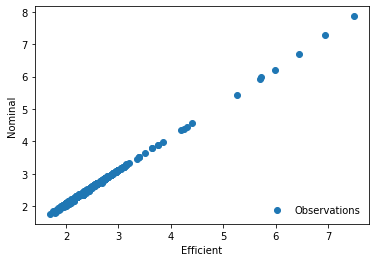

In [5]:
fig,ax = plt.subplots()

#adding axis lables: 
ax.set_ylabel ('Nominal') 
ax.set_xlabel ('Efficient')

#plotting the function: 
ax.scatter( data[ 'Nominal' ],  data['Efficient'],   label = 'Observations' ) 
ax.legend ( loc = 'lower right' , frameon = False )

In [6]:
y = data["Nominal"]

x = pd.DataFrame(data["Efficient"] )
x['intercept'] = 1 
x.head()

,Efficient,intercept
0,1.76,1
1,1.79,1
2,1.83,1
3,1.83,1
4,1.86,1


### Estimate 
Estimate coefficients 
α
 and 
β
 which best fits the data. Then we use OLS from statsmodels and insert y and x:

In [7]:
model =OLS(y,x ).fit ()

print (model.summary ())

                            OLS Regression Results                            
Dep. Variable:                Nominal   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.957e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        01:24:15   Log-Likelihood:                 892.12
No. Observations:                 361   AIC:                            -1780.
Df Residuals:                     359   BIC:                            -1772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Efficient      0.9599      0.002    629.055      0.0

### Plot regression line

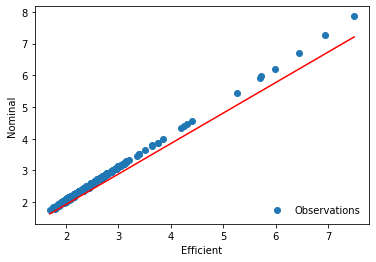

In [8]:
x=np.linspace(min(data["Nominal"]),  max (data["Nominal"]),  100 )

regression_line = model.params ['intercept'] + model.params ['Efficient'] * x

ax.plot(x,regression_line , color = 'red' ) 
fig

### Result
The results of the regression above, Shows that:

    α = 0.009
    β = 0.9599

    The regression line fits the data well.This line represent the least distance on average to the the points
 in the our data. The distance is measured as square of the vertical difference.writen as:
    
    y = α+β⋅x
    
Which is an equation of a straight line with a +ve gradient.
